In [34]:
library(dplyr)
library(ggplot2)

In [35]:
pca <- read.csv("../data/08_tss_expression_matrix_ICIM/G_KC_PCA.data.csv")

In [36]:
head(pca)

cell_number,Component_0,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,⋯,CellID,Age,Gender,Genotype,Replicate,nGene,nUMI,cell_type_id,is_kc,hdb_clust
1,-2.7139975,-1.40727124,1.1351579,0.2497073,1.629541,2.1066045,0.1742238,-1.413990,-0.2295990,⋯,ACATACGAGGGCTTCC-DGRP-551_0d_r1,0,Female,DGRP-551,DGRP-551_0d_Rep1,1328,3340,8,1,-1
2,-1.4807331,0.17360313,-4.4588481,-1.9193386,-1.927817,-1.1852362,1.2909186,1.348443,0.9139063,⋯,ACCCACTTCACTCTTA-DGRP-551_0d_r1,0,Female,DGRP-551,DGRP-551_0d_Rep1,1613,4580,8,1,-1
4,-3.1161314,0.56280862,-0.6456232,0.5172801,-2.161541,-0.1549851,-0.5177331,-2.346338,0.3652674,⋯,ACTTACTAGTGGTAAT-DGRP-551_0d_r1,0,Male,DGRP-551,DGRP-551_0d_Rep1,1174,2942,8,1,-1
5,-1.4118346,-0.78582028,-2.3204785,-2.7719864,-1.724407,-0.9525823,0.9537235,1.261652,0.6037430,⋯,ACTTGTTCATGGTTGT-DGRP-551_0d_r1,0,Male,DGRP-551,DGRP-551_0d_Rep1,1410,3620,8,1,-1
6,-3.6427991,-0.01641273,-0.3256371,0.4693574,-1.961104,-1.2708109,-3.7597197,-1.904319,0.8196229,⋯,ACTTTCATCAATAAGG-DGRP-551_0d_r1,0,Male,DGRP-551,DGRP-551_0d_Rep1,1378,3995,8,1,-1
7,-0.2942579,0.61126043,-1.5166245,-0.3078090,-1.164885,0.9905725,1.5038915,1.086054,-0.0572275,⋯,AGATCTGCAACAACCT-DGRP-551_0d_r1,0,Male,DGRP-551,DGRP-551_0d_Rep1,1578,4379,8,1,-1


In [37]:
colnames(pca)

[1] "cell_number"  "Component_0"  "Component_1"  "Component_2"  "Component_3" 
 [6] "Component_4"  "Component_5"  "Component_6"  "Component_7"  "Component_8" 
[11] "Component_9"  "dna_index"    "CellID"       "Age"          "Gender"      
[16] "Genotype"     "Replicate"    "nGene"        "nUMI"         "cell_type_id"
[21] "is_kc"        "hdb_clust"

In [41]:
gkc_pca <- pca %>%
  ggplot() +
  geom_point(aes(x=Component_1, y=Component_2, color=factor(Age))) +
  theme_classic() +
  xlab("PCA Component 1") +
  ylab("PCA Component 2") +
  labs(color="Age")

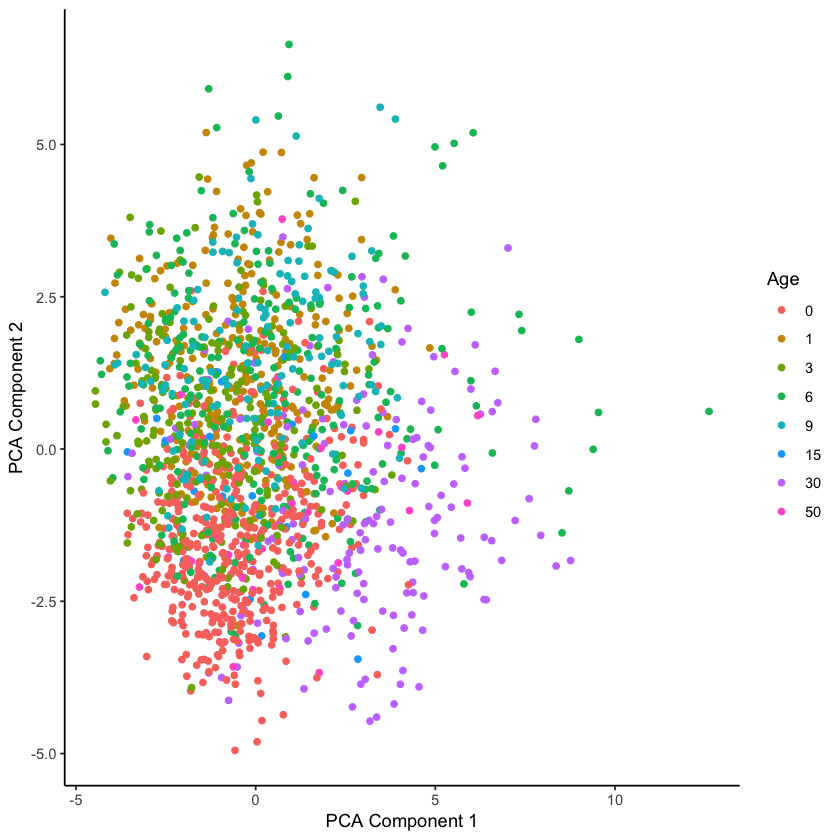

In [42]:
gkc_pca

In [44]:
ggsave(
  filename = "../data/figures/G-KC_PCA_by_Age.pdf",
  plot = gkc_pca,
  width = 6,
  height = 6,
  units='in'
)

In [2]:
df <- read.csv("../data/08_tss_expression_matrix_ICIM/G_KC_PCA_TSNE_data.csv")

In [4]:
head(df)

cell_number,dna_index,CellID,Age,Gender,Genotype,Replicate,nGene,nUMI,cell_type_id,is_kc,x,y,hdb_clust
1,ACATACGAGGGCTTCC,ACATACGAGGGCTTCC-DGRP-551_0d_r1,0,Female,DGRP-551,DGRP-551_0d_Rep1,1328,3340,8,1,-28.070786,-29.515430,7
2,ACCCACTTCACTCTTA,ACCCACTTCACTCTTA-DGRP-551_0d_r1,0,Female,DGRP-551,DGRP-551_0d_Rep1,1613,4580,8,1,-27.082571,7.939954,9
4,ACTTACTAGTGGTAAT,ACTTACTAGTGGTAAT-DGRP-551_0d_r1,0,Male,DGRP-551,DGRP-551_0d_Rep1,1174,2942,8,1,18.073668,-35.170155,0
5,ACTTGTTCATGGTTGT,ACTTGTTCATGGTTGT-DGRP-551_0d_r1,0,Male,DGRP-551,DGRP-551_0d_Rep1,1410,3620,8,1,-27.542780,5.125721,9
6,ACTTTCATCAATAAGG,ACTTTCATCAATAAGG-DGRP-551_0d_r1,0,Male,DGRP-551,DGRP-551_0d_Rep1,1378,3995,8,1,3.197817,-32.231083,0
7,AGATCTGCAACAACCT,AGATCTGCAACAACCT-DGRP-551_0d_r1,0,Male,DGRP-551,DGRP-551_0d_Rep1,1578,4379,8,1,-25.620203,6.633066,9


In [5]:
gkc_pca_tsne <- df %>%
  ggplot() +
  geom_point(aes(x=x, y=y, color=factor(hdb_clust))) +
  theme_classic() +
  xlab("TSNE Axis-1") +
  ylab("TSNE Axis-2") +
  labs(color="G-KC Subcluster")

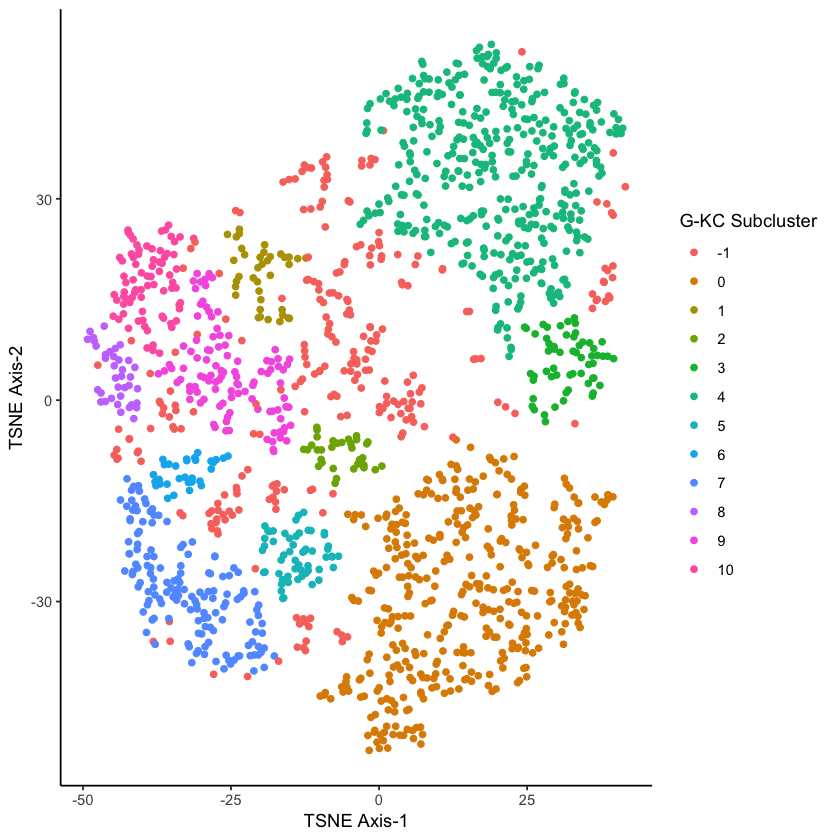

In [6]:
gkc_pca_tsne

In [7]:
ggsave(
  filename = "../data/figures/G-KC_PCA_TSNE_by_hdbcluster.pdf",
  plot = gkc_pca_tsne,
  width = 6,
  height = 6,
  units='in'
)